In [4]:
import pandas as pd
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt

## json_dumps - converts json object to string 
## json_loads   - converts json string to object (we need object in form of dict to access values)

   1 Hour change  24 Hour change          Name
0          -0.21            1.63       Bitcoin
1          -0.21            0.56      Ethereum
2          -0.40            1.12           XRP
3          -0.35            0.66  Bitcoin Cash
4          -0.70            0.97           EOS
5          -0.33            0.03       Stellar
6          -0.43            0.08      Litecoin
7           0.20            0.16        Tether
8          -0.36            1.01       Cardano
9          -0.51            0.19        Monero


<IPython.core.display.Javascript object>


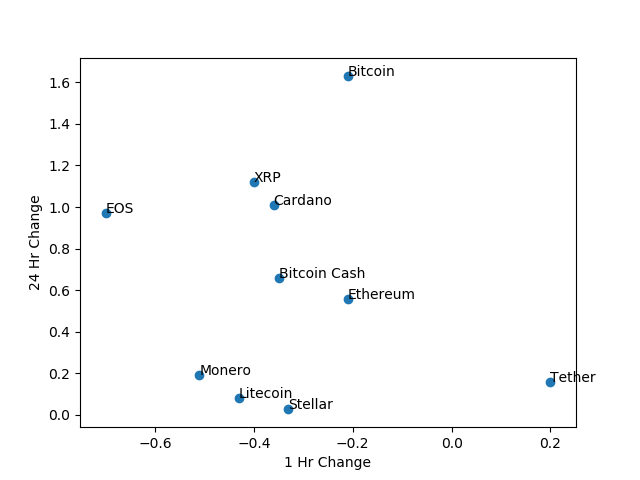

In [46]:
%matplotlib notebook
%matplotlib notebook
info = json.load(urlopen('https://api.coinmarketcap.com/v2/ticker/?limit=10')) # deserializing json ,i.e.,converting
                                                                               # json string to json object for json_normalize 
df=pd.DataFrame()
info['data']['1']
for x in info['data']:
    a=info['data'][x]['name']
    b=info['data'][x]['quotes']['USD']['percent_change_1h']
    c=info['data'][x]['quotes']['USD']['percent_change_24h']
    df=df.append({'Name':a,
                  '1 Hour change':b,
                  '24 Hour change':c},ignore_index=True)
#  now i need to plot 2d graph of dataframe
print(df)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(df['1 Hour change'],df['24 Hour change'])
plt.xlabel('1 Hr Change')
plt.ylabel('24 Hr Change')

i=0
for xy in zip(df['1 Hour change'],df['24 Hour change']):                                       # <--
    ax.annotate('%s'%df.Name[i], xy=xy, textcoords='data') # <--
    i+=1
plt.show()
